In [118]:
import glob
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

PATH='dataset/electricity_data_all/*'
#Index(['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'RRP', 'PERIODTYPE'], dtype='object')

In [119]:
month2rrp = defaultdict(list)
month2demand = defaultdict(list)

def get_day_month(day_str):
    day = day_str.split()[0]
    month = '/'.join(day.split('/')[:2])
    return day, month

for file in glob.glob(PATH):
    df = pd.read_csv(file)
    for idx, row in df.iterrows():
        day, month = get_day_month(row['SETTLEMENTDATE'])        
        month2demand[month].append(row['TOTALDEMAND'])
        month2rrp[month].append(row['RRP'])    

In [120]:
months=[]; rrp=[]; demand=[]
for month in day2rrp.keys():
    months.append(month)
    rrp.append(np.mean(month2rrp[month]))
    demand.append(np.mean(month2demand[month]))

In [121]:
df = pd.DataFrame()
df['month']=months
df['rrp']=rrp
df['demand']=demand
df = df.sort_values(by=['month'],ignore_index=True)
#df = df[df['month']>'2018-01']

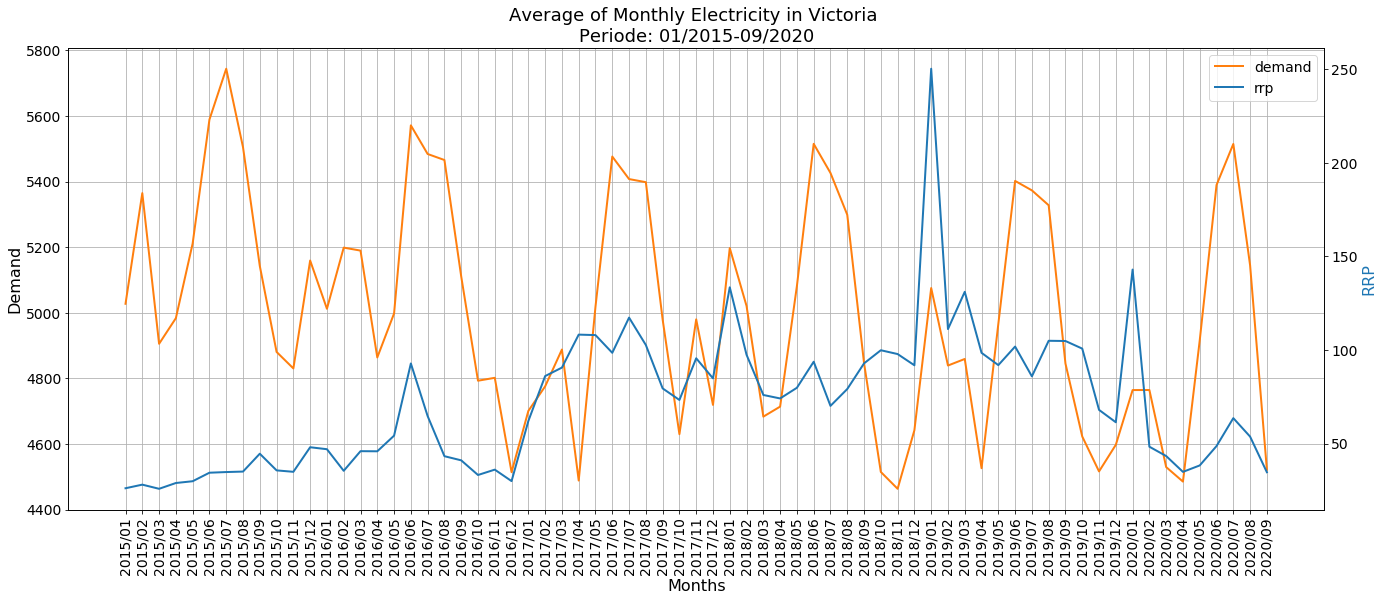

In [123]:
fig, ax = plt.subplots()
fig.set_size_inches(22.5, 8.5)
ax.grid()

plt.xticks(rotation=90)
ax.plot( 'month', 'demand', data=df, marker='', color='tab:orange', linewidth=2)
plt.xlabel('Months',fontsize=16)
plt.ylabel('Demand', fontsize=16)
plt.tick_params(labelsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot( 'month', 'rrp', data=df, marker='', markerfacecolor='blue', color='tab:blue', linewidth=2)
ax2.set_ylabel("RRP",color="tab:blue",fontsize=16)
plt.tick_params(labelsize=14)

plt.title('Average of Monthly Electricity in Victoria \nPeriode: 01/2015-09/2020', fontsize=18)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes, fontsize=14)
#fig.savefig("monthly_electricity.pdf", bbox_inches='tight')